## Fig S7: Optimal mutation rate as a function of transcription factor copy numbers and wild-type binding energies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize

# visualization
from tregs.mpl_pboc import plotting_style

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

plt.rcParams.update({'font.size': 12})
plotting_style()

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426'}

In [2]:
def simple_repression(
    m,
    epsilon_R,
    epsilon_P,
    delta_epsilon_R,
    delta_epsilon_P,
    R,
    P,
    l_R,
    l_P):
  return R/P * np.exp(-(epsilon_R + m * l_R * delta_epsilon_R)) / np.exp(-(epsilon_P + m * l_P * delta_epsilon_P))

def simple_repression_zero(
    m,
    epsilon_R,
    epsilon_P,
    delta_epsilon_R,
    delta_epsilon_P,
    R,
    P,
    l_R,
    l_P):
  return simple_repression(m, epsilon_R, epsilon_P, delta_epsilon_R, delta_epsilon_P, R, P, l_R, l_P) - 1


## Vary Copy numbers

In [3]:
np.concatenate(([np.arange(1, 10), np.arange(10, 20)]))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

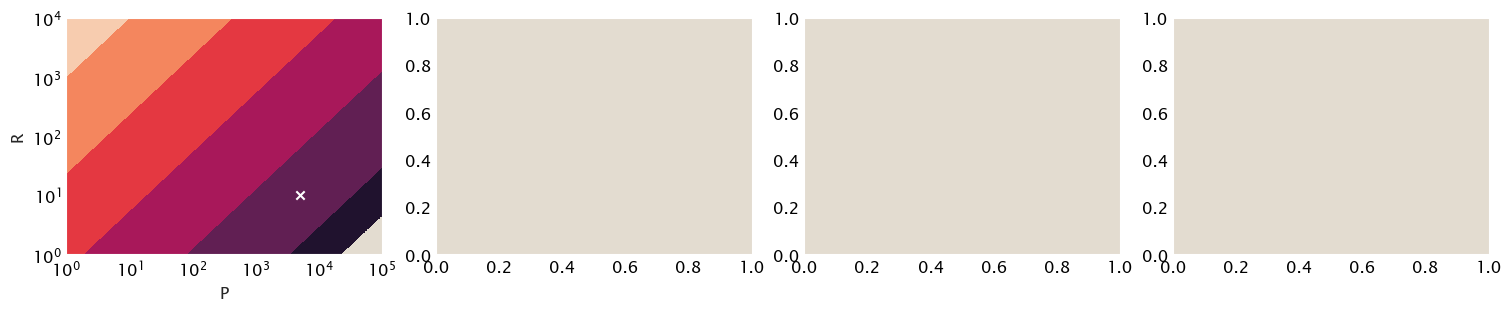

In [4]:
fig, ax = plt.subplots(1, 4, figsize=(15, 3), layout='compressed')

R_range = np.logspace(0, 4, 500)
P_range = np.logspace(0, 5, 500)
z =  -1 * np.ones([len(R_range), len(P_range)])
for i, R in enumerate(R_range):
  for j, P in enumerate(P_range):
    if simple_repression(0, -15, -5, 2.24, 0.36, R, P, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(-15, -5, 2.24, 0.36, R, P, 20, 20), full_output=1, disp=False)
      if r.converged:
        z[i, j] = x

cset = ax[0].contourf(P_range, R_range, z, origin="lower", extent=(1, P_range.max(), 1, R_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55])
#cbar = fig.colorbar(cset, ax=ax, label='mutation rate', )
#cbar.ax.set_yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])  # horizontal colorbar
ax[0].set_ylabel("R")
ax[0].set_xlabel("P")

ax[0].set_ylim(R_range.min(), R_range.max())
ax[0].set_xlim(P_range.min(), P_range.max())
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].scatter([5000], [10], marker='x',color='white')
ax[0].grid(False)

In [5]:
epsilon_R_range = np.linspace(-20, -12, 100)
epsilon_P_range = np.linspace(-10, -3, 100)
z =  -1 * np.ones([len(epsilon_R_range), len(epsilon_P_range)])
for i, epsilon_R in enumerate(epsilon_R_range):
  for j, epsilon_P in enumerate(epsilon_P_range):
    if simple_repression(0, epsilon_R, epsilon_P, 2.24, 0.36, 10, 5000, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(epsilon_R, epsilon_P, 2.24, 0.36, 10, 5000, 20, 20), disp=False, full_output=1)
      if r.converged:
        z[i, j] = x


cset = ax[1].contourf(epsilon_P_range, epsilon_R_range, z, origin="lower", extent=(epsilon_P_range.min(), epsilon_P_range.max(), epsilon_R_range.min(), epsilon_R_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55])
#cbar = fig.colorbar(cset, ax=ax, label='mutation rate', )
#cbar.ax[1].set_yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])  # horizontal colorbar
ax[1].set_ylabel(r"$\Delta\varepsilon_\mathrm{rd}\:(k_BT)$")
ax[1].set_xlabel(r"$\Delta\varepsilon_\mathrm{pd}\:(k_BT)$")
ax[1].scatter([-5], [-15], marker='x',color='white')
ax[1].grid(False)

In [6]:
z =  -1 * np.ones([len(epsilon_R_range), len(R_range)])
for i, epsilon_R in enumerate(epsilon_R_range):
  for j, R in enumerate(R_range):
    if simple_repression(0, epsilon_R, -5, 2.24, 0.36, R, 5000, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(epsilon_R, -5, 2.24, 0.36, R, 5000, 20, 20), full_output=True, disp=False)
      if r.converged:
        z[i, j] = x



cset = ax[2].contourf(R_range, epsilon_R_range, z, origin="lower", extent=(1, R_range.max(), epsilon_R_range.min(), epsilon_R_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55])

ax[2].set_ylabel(r"$\Delta\varepsilon_\mathrm{rd}\:(k_BT)$")
ax[2].set_xlabel("R")
ax[2].set_xscale('log')
ax[2].scatter([10], [-15], marker='x',color='white')
ax[2].grid(False)

In [7]:
z = -1 * np.ones([len(epsilon_P_range), len(P_range)])
for i, epsilon_P in enumerate(epsilon_P_range):
  for j, P in enumerate(P_range):
    if simple_repression(0, -15, epsilon_P, 2.24, 0.36, 10, P, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(-15, epsilon_P, 2.24, 0.36, 10, P, 20, 20), full_output=True, disp=False)
      if r.converged:
        z[i, j] = x

cset = ax[3].contourf(P_range, epsilon_P_range, z, origin="lower", extent=(P_range.min(), P_range.max(), epsilon_P_range.min(), epsilon_P_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55])

ax[3].set_ylabel(r"$\Delta\varepsilon_\mathrm{pd}\:(k_BT)$")
ax[3].set_xlabel("P")
ax[3].set_xscale('log')
ax[3].scatter([5000], [-5], marker='x',color='white')
ax[3].grid(False)

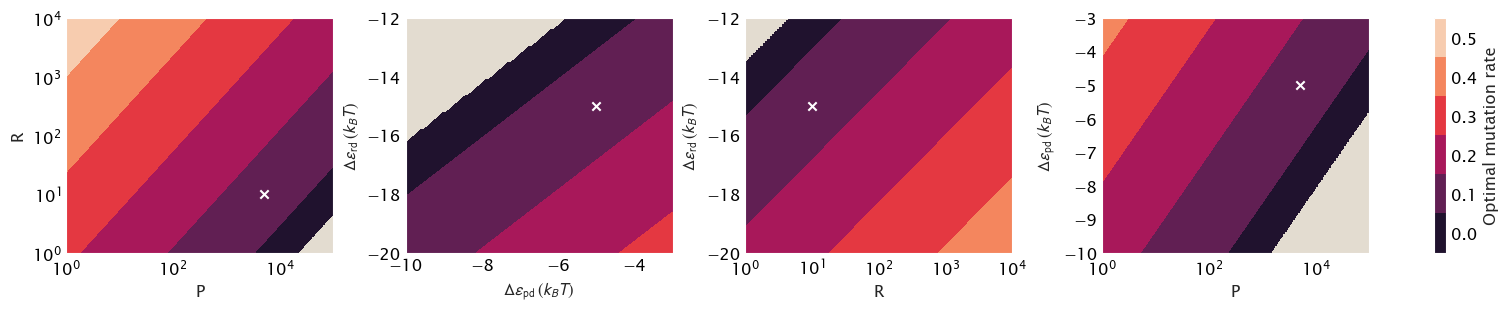

In [8]:
#plt.tight_layout()
cbar = fig.colorbar(cset, ax=ax, label='Optimal mutation rate', )
cbar.ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
cbar.ax.set_position([0.77, 0.01, 0.02, 1])  # [left, bottom, width, height]
#plt.subplots_adjust(right=10, wspace=10, hspace=10)

fig

In [10]:
fig.savefig("../plots/figS7/opt_mut_rate.pdf")